# Задание

    Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в еонкретном регионе от времени,

    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

    в) количество отказов компьютера,

    г) число обращений в поликлинику по району,

    д) координаты автобуса при движении по маршруту,

    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

    

а - можно
б - нельзя, но если например условием будет непрерывнй набор скорости до достижения определённой точки в пути и после её достижения - непрерывный сброс скорости до самой посадки, то можно
в - нельзя, если мы не будем замерять их количество в определённый промежуток времени, жень\час\месяц\неделя...
г - нельзя, но аналогично с пунктов В
д - можно
е - можно

# Задание
Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [15]:
%matplotlib inline
# !pip install pandas_profiling
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns
import pandas_profiling

from sklearn.metrics import mean_squared_error

In [6]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [10]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


    В датасэте есть два параметра. Datetime содержащий ГГГГ ММ ДД ЧЧ и число с плавающей точкой с точностью до единиц

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


    В датасэте 119 068 записей за период с 2005-12-31 01:00:00 по 2018-01-01 00:00:00.

In [11]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


    Проверим датасет на пропуски

In [12]:
data['DUQ_MW'].isnull().sum()

0

    Ни одна запись не пропущена

Text(0, 0.5, 'МВт')

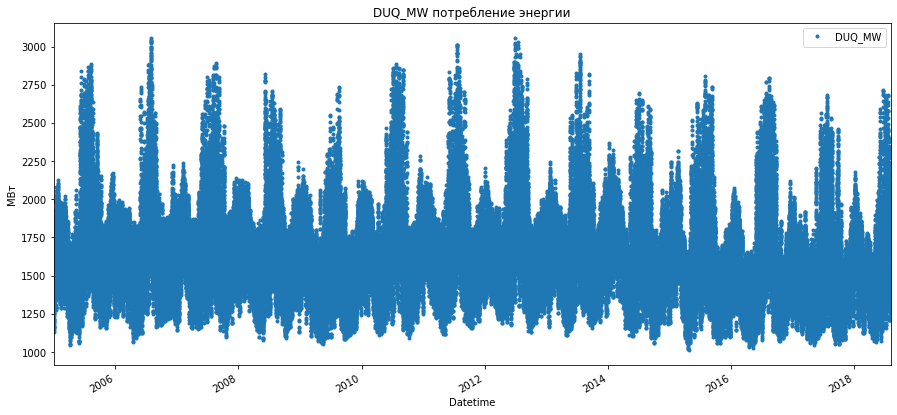

In [13]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

    Ожидаемо неблюдается сезонность. Каких-то аномалей на первый взгляд не обнаружено. Прогоним жатасет через профайлер.

In [18]:
pandas_profiling.ProfileReport(data)
#Господи! Я мечтал о такой штуке с детства!

    К несчастью на таком малом по количеству параметров датасете, профайлер ничего не покажет :(. Чтож, преобразуем данныые из float в int и будем радоваться крутоте урока :)

In [20]:
data['DUQ_MW'] = data['DUQ_MW'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null int64
dtypes: int64(1)
memory usage: 1.8 MB


    Из особенностей этой выборки можно сказать, что она из коробки поставляется в хорошем состоянии

# Задание
Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.



In [64]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [65]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [66]:
brent_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [67]:
brent_data[brent_data['Значение'].isnull()].count()

Значение    0
dtype: int64

Text(0.5, 0, 't')

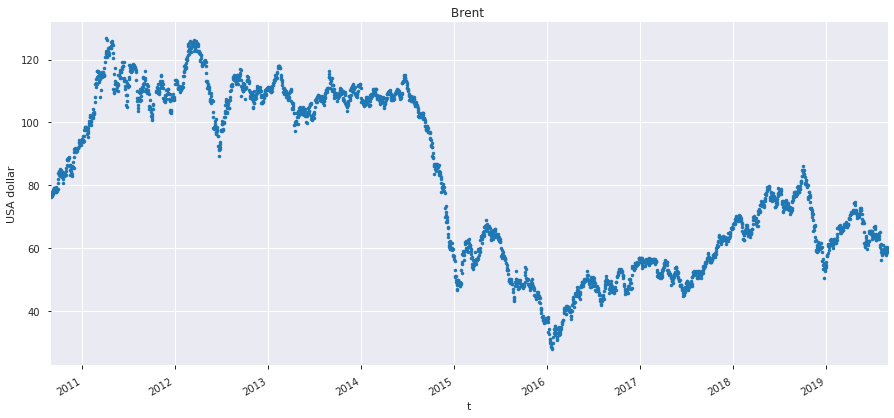

In [72]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

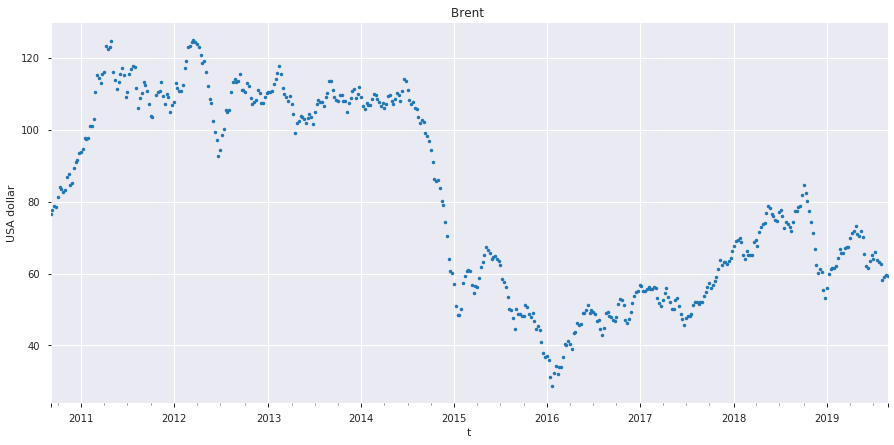

In [82]:
brent_data_w = brent_data.copy().resample("W").mean()
_ = brent_data_w['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

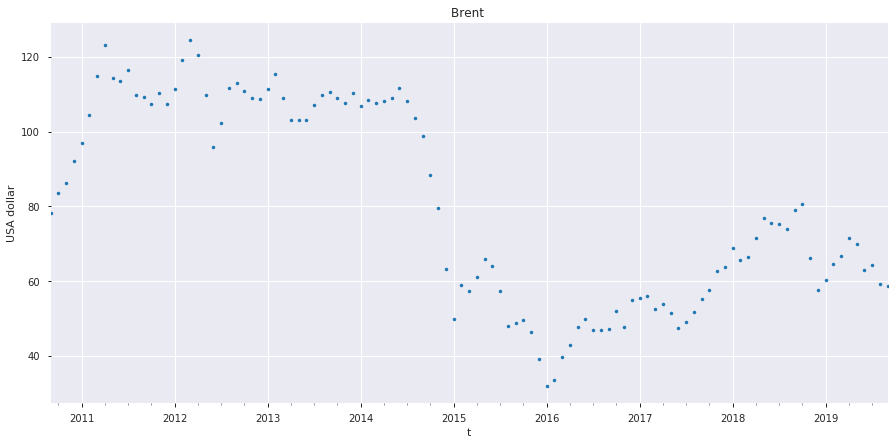

In [80]:
brent_data_m = brent_data.copy().resample("M").mean()
_ = brent_data_m['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

# Задание
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Text(0.5, 0, 't')

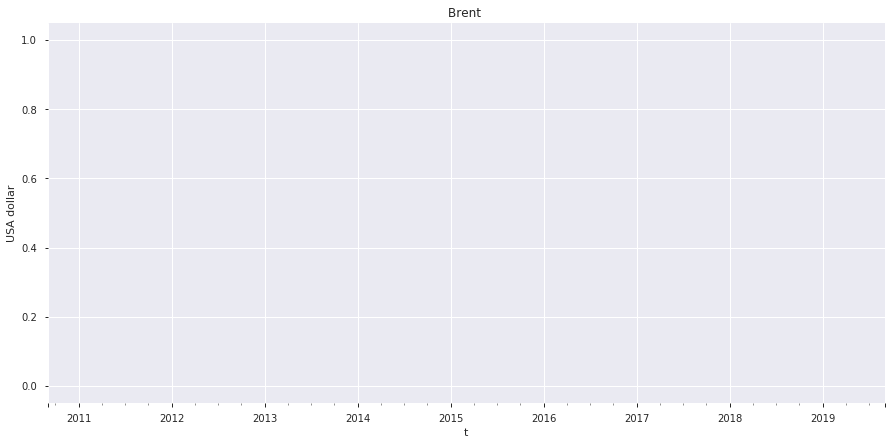

In [90]:
brent_data_d = brent_data.copy().resample("D").std()
_ = brent_data_d['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

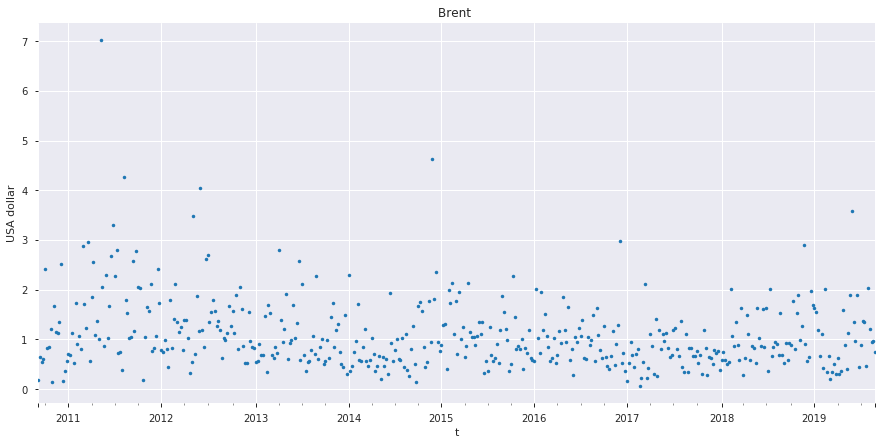

In [92]:
brent_data_w = brent_data.copy().resample("W").std()
_ = brent_data_w['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

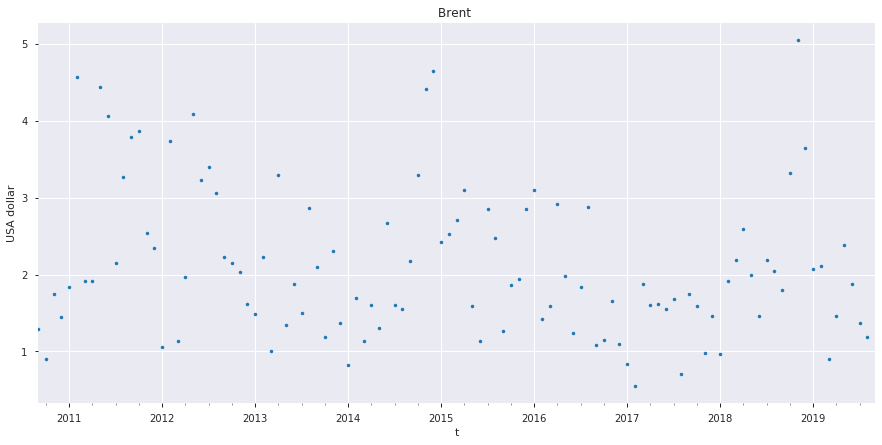

In [85]:
brent_data_m = brent_data.copy().resample("M").std()
_ = brent_data_m['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

# Задание
Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

На недельных и месячных графиках изменение цены стало более резким, в отличии от дневных графиков, где из-за количества записей, переход от цены к цене идёт более мелкими шагами